### Import libraries

In [320]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import os
import pandas as pd
import spacy
from textblob import TextBlob
import tweepy

### Load environmental variables

Link: https://nono.ma/environment-variable-python-notebook-os-environ-get

In [2]:
load_dotenv()
KEY = os.environ.get('KEY')
SECRET = os.environ.get('SECRET')

### Creating an OAuthHandler instance and API

In [121]:
auth = tweepy.OAuthHandler(KEY, SECRET)
api = tweepy.API(auth)

### Searching Tweets with a subject 'query'

In [136]:
def search_tweets(query, max_tweets):
    return [status for status in tweepy.Cursor(api.search_tweets, q=query,lang='en',result_type='recent').items(max_tweets)]
    

### Defining functions to help access data 

In [105]:
def extract_data(data):
    '''
    Function: extract_data(data) 
        - data argument is the output of api.search_tweets
        - returns data in a easy format 
    '''
    return{
        "created_at": data.get("created_at",None),
        "id": data.get("id",None),
        "text": data.get("text",None),
        "language": data.get("lang",None),
        "retweet_count":data.get("retweet_count",None)        
    }
def extract_data_helper(dataList):
    return (extract_data(data._json) for data in dataList)

### Extracting tweets and transforming them into a dataframe

In [150]:
def get_dataframe(subject, num_tweets):
    data = extract_data_helper(search_tweets(subject,num_tweets))
    df = pd.DataFrame(data)
    df = df.sort_values(by='retweet_count',ascending=False).reset_index(drop=True)
    return df

### Function to analyse sentiment for each tweet

In [297]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def clean_tweet(text):
    clean_text = re.sub(r'([.?!,:;"\'…])|(RT @\w+ )|(@\w+ )]', '', text)
    return clean_text


def analysing_sentiment(dataframe):
    polarity = []
    for tweet in dataframe.text:        
        tweet1 = clean_tweet(tweet)
        doc = nlp(tweet1)
        if doc._.polarity != 0.0:
            polarity.append(doc._.polarity)
    return polarity

In [295]:
print(re.sub(r'(RE )|(@\w+ )', '','oi RE @22_merri @w_white18 @NathanMackBrown @Bellamy11111 That'))

oi That


### Function to plot sentiment summary

In [315]:
def plot_sentiment(polarity, subject):    
    plt.hist(polarity,bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    plt.xlabel('Polarity')
    plt.title(f'Sentiment of Tweets on {subject}')
    plt.show()

### Getting tweets and ploting results for different subjects

#### Covid

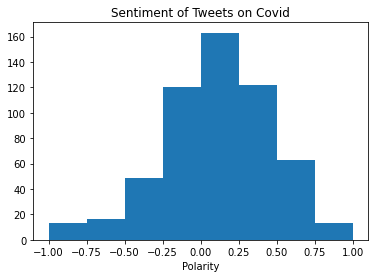

In [316]:
df = get_dataframe('covid -filter:retweets', 1000)
df = df.drop_duplicates()
polarity = analysing_sentiment(df)
plot_sentiment(polarity,'Covid')

#### Climate change

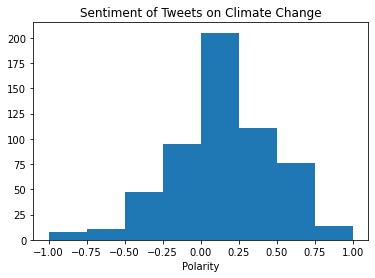

In [319]:
df = get_dataframe('climate change -filter:retweets', 1000)
df = df.drop_duplicates()
polarity = analysing_sentiment(df)
plot_sentiment(polarity,'Climate Change')

#### Cripto

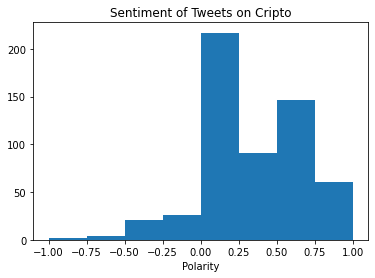

In [318]:
df = get_dataframe('cripto -filter:retweets', 1000)
df = df.drop_duplicates()
polarity = analysing_sentiment(df)
plot_sentiment(polarity,'Cripto')